**CS109A Final Project**<br/>
**Group 12**<br/>
**EDA Page**<br/>

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**We performed our EDA using data from the Spotify API. The API featured "metadata in JSON format about artists, albums, and tracks directly from the Spotify catalogue".** 


The data used below for our EDA features 1585 playlists that we accessed using the Spotipy package, enabling us to pull data on Spotify's own curated playlists. We analyzed data on these playlists with all of their songs, as well as their artist name, whether they were explicit or not, duration, the artist's popularity (if there were multiple artists we only took the first artist) and number of followers, as well as the genres that the artist is classified under.

In [3]:
# Load in data
df = pd.read_csv('total_info.csv', encoding = 'latin-1')

In [4]:
# Clean Variables
del df['Unnamed: 0']
df['artist_popularity'] = pd.to_numeric(df['artist_popularity'], errors = 'coerce')
df['artist_followers'] = pd.to_numeric(df['artist_followers'], errors = 'coerce')

In [5]:
df.head()

,playlist_id,playlist_name,followers,song_name,number_of_artists,artist_name,artist_id,popularity,track_number,explicit,duration_ms,available_markets,delete,artist_popularity,artist_followers,artist_genres
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,18123888.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
1,37i9dQZF1DWXDAhqlN7e6W,This Is: Max Martin,15685.0,Hands To Myself,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,69,3,0,200680,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
2,37i9dQZF1DX7Q7o98uPeg1,Funkst,397098.0,Good For You - KASBO Remix,3,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,35,3,0,221560,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
3,37i9dQZF1DX3LyU0mhfqgP,Out Now,439685.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
4,37i9dQZF1DX35oM5SPECmN,HIIT Workout,712771.0,Come & Get It,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,56,1,0,231733,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"


We appended indicator variables to tell us whether a song in a playlist could be classified as a pop/rap/rock song, as well as if the song was written by a popular artist. We defined a “popular artist” as one ranked by Spotify as above 75 on an artist popularity scale of 1-100 (since this was the third quartile value). 

In [6]:
# Create genre indicator variable arrays
pop_ind = []
rap_ind = []
rock_ind = []
hip_hop_ind = []

for idx, row in enumerate(df['artist_genres'].values):
    if 'pop' in row:
        pop_ind.append(1)
        rap_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(0)
    elif 'rap' in row:
        rap_ind.append(1)
        pop_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(0)
    elif 'rock' in row:
        rock_ind.append(1)
        rap_ind.append(0)
        pop_ind.append(0)
        hip_hop_ind.append(0)
    elif 'hip' in row:
        rap_ind.append(0)
        pop_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(1)
    else:
        pop_ind.append(0)
        rap_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(0)
        
# Append array to dataframe
df['pop_ind'] = pop_ind
df['rap_ind'] = rap_ind
df['rock_ind'] = rock_ind
df['hip_hop_ind'] = hip_hop_ind

In [9]:
# Artist Popularity 75% is a 75, use for indicator 
df['popular_artist_ind'] = (df['artist_popularity'] >= 75)*1
df.columns

Index(['playlist_id', 'playlist_name', 'followers', 'song_name',
       'number_of_artists', 'artist_name', 'artist_id', 'popularity',
       'track_number', 'explicit', 'duration_ms', 'available_markets',
       'delete', 'artist_popularity', 'artist_followers', 'artist_genres',
       'pop_ind', 'rap_ind', 'rock_ind', 'hip_hop_ind', 'popular_artist_ind'],
      dtype='object')

In [10]:
# Sum Up the 100 tracks of info (or less) for each playlist
unique_plists = df['playlist_id'].unique()
columns = ['playlist','name','followers','num_songs','av_song_pop','pct_explicit','avg_dur','av_artist_followers', 'pop_pct', 'rap_pct', 'rock_pct', 'popular_artist_pct']
eda_frame = pd.DataFrame(index=range(0,len(unique_plists)), columns=columns)

for idx,plist in enumerate(unique_plists):
    eda_frame.loc[idx]['playlist'] = plist
    eda_frame.loc[idx]['name'] = df.loc[df['playlist_id'] == plist]['playlist_name']
    eda_frame.loc[idx]['followers'] = np.mean(df.loc[df['playlist_id'] == plist]['followers'])
    eda_frame.loc[idx]['num_songs'] = len(df.loc[df['playlist_id'] == plist])
    eda_frame.loc[idx]['av_song_pop'] = np.mean(df.loc[df['playlist_id'] == plist]['popularity'])
    eda_frame.loc[idx]['pct_explicit'] = np.mean(df.loc[df['playlist_id'] == plist]['explicit'])
    eda_frame.loc[idx]['avg_dur'] = np.mean(df.loc[df['playlist_id'] == plist]['duration_ms'])
    eda_frame.loc[idx]['av_artist_followers'] = np.mean(df.loc[df['playlist_id'] == plist]['artist_followers'])
    eda_frame.loc[idx]['pop_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['pop_ind'])
    eda_frame.loc[idx]['rap_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['rap_ind'])
    eda_frame.loc[idx]['rock_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['rock_ind'])
    eda_frame.loc[idx]['hip_hop_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['hip_hop_ind'])
    eda_frame.loc[idx]['avg_num_artists'] = np.mean(df.loc[df['playlist_id'] == plist]['number_of_artists'])
    eda_frame.loc[idx]['popular_artist_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['popular_artist_ind'])

We aggregated the data from individual songs into averages across entire playlists. These conglomerated metrics include the playlist’s average artist followers, percent explicit, number of songs, percent of playlist that is a certain genre (pop, rap, rock, etc), percent popular artists, average song duration, average song popularity (scale of 1-100).

In [11]:
eda_frame.head()

,playlist,name,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct
0,37i9dQZF1DXcBWIGoYBM5M,0 Today's Top Hits 47 Today's Top H...,1.81239e+07,50,82.38,0.34,208121,2.75535e+06,0.8,0.06,0,1
1,37i9dQZF1DWXDAhqlN7e6W,1 This Is: Max Martin 125 This Is:...,15685,44,55.5227,0.113636,220925,3.99045e+06,0.977273,0,0.0227273,0.75
2,37i9dQZF1DX7Q7o98uPeg1,2 Funkst 2500 Funkst 2569 Funks...,397098,100,32.87,0.09,241358,319005,0.12,0.42,0.02,0.08
3,37i9dQZF1DX3LyU0mhfqgP,3 Out Now 48 Out Now 267 Out...,439685,55,71.7273,0.181818,207392,1.02241e+06,0.654545,0,0,0.6
4,37i9dQZF1DX35oM5SPECmN,4 HIIT Workout 129 HIIT Workout 48...,712771,50,59.06,0.12,223608,3.32207e+06,0.9,0,0.04,0.62


In [12]:
eda_frame['log_followers'] = np.log(eda_frame['followers'].astype(float))
eda_frame['log_artist_follow'] = np.log(eda_frame['av_artist_followers'].astype(float))
eda_frame = eda_frame.dropna(0)
eda_frame = eda_frame.replace([np.inf, -np.inf], 0)

In [30]:
# Summarizing our quantitative data
eda_frame.drop(['playlist', 'name'], axis = 1).describe()

,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct,log_followers,log_artist_follow
count,1.584000e+03,1584.000000,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,2.142093e+05,52.605429,38.331537,0.088401,2.657999e+05,9.070557e+05,0.438389,0.028073,0.146948,0.278765,9.574142,12.456636
std,6.863399e+05,25.069536,15.897419,0.185671,1.679411e+05,1.368342e+06,0.358942,0.094440,0.242333,0.316079,3.254485,2.118953
min,0.000000e+00,5.000000,0.000000,0.000000,3.962875e+04,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225
25%,1.746250e+03,32.000000,27.724700,0.000000,2.146209e+05,9.689143e+04,0.040000,0.000000,0.000000,0.010000,7.465226,11.481337
50%,3.029700e+04,50.000000,39.426216,0.010000,2.327892e+05,3.867883e+05,0.453229,0.000000,0.033333,0.150000,10.318803,12.865618
75%,1.628768e+05,66.000000,49.196341,0.084105,2.581028e+05,1.116790e+06,0.763927,0.000000,0.180000,0.460000,12.000749,13.925968
max,1.812389e+07,100.000000,82.380000,1.000000,2.507284e+06,1.424941e+07,1.000000,1.000000,1.000000,1.000000,16.712741,16.472226


## Exploring the distribution of followers

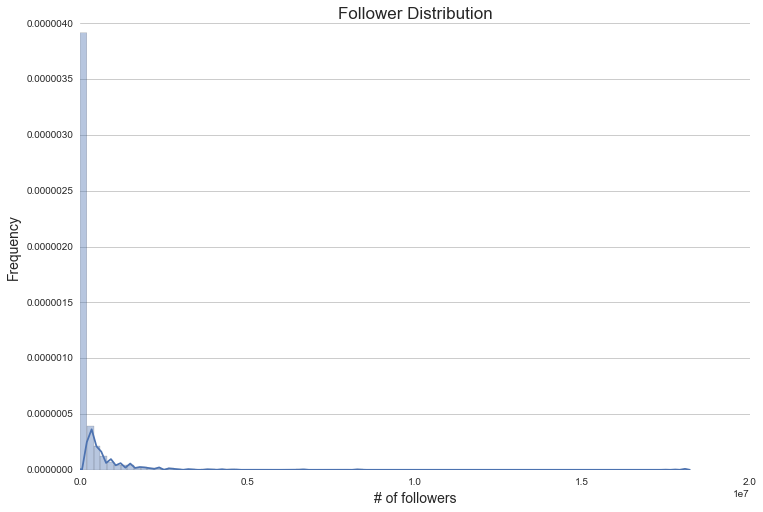

In [25]:
plt.figure(figsize = (12,8))
sns.distplot(eda_frame['followers'], bins = 90);
plt.title('Follower Distribution', size = 17)
plt.xlabel("# of followers", size = 14);
plt.ylabel("Frequency", size = 14)
sns.despine(bottom=True, left=True)
plt.xlim(0,2*10**7)
plt.grid(axis = 'x', color ='white', linestyle='-')
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);

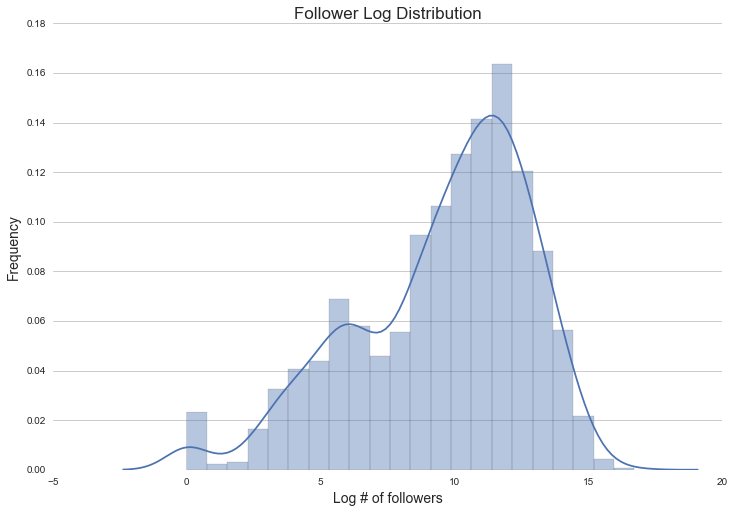

In [22]:
plt.figure(figsize = (12,8))
sns.distplot(eda_frame['log_followers']);
plt.title('Follower Log Distribution', size = 17)
plt.xlabel("Log # of followers", size = 14);
plt.ylabel("Frequency", size = 14)
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color ='white', linestyle='-')
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);

### Exploring relationship between artist/song popularity and playlist popularity:

This is a very unbalanced data set, and thus for much of our EDA we looked only at the **top 25%** of playlists in terms of follower number. The hope here is that this would be more illuminating in highlighting any trends, and would be less bogged down in the high number of playlists that have little to no followers. 

In [68]:
top_quart = eda_frame['followers'].quantile(0.75)
top_frame = eda_frame.loc[eda_frame['followers'] >= top_quart]

top_sorted = top_frame.sort_values(by='log_followers')
log_followers_top = list(top_sorted['log_followers'])
followers_top = list(top_sorted['followers'])
pop_top = list(top_sorted['av_song_pop'])

### Average Song Popularity vs. Log Followers

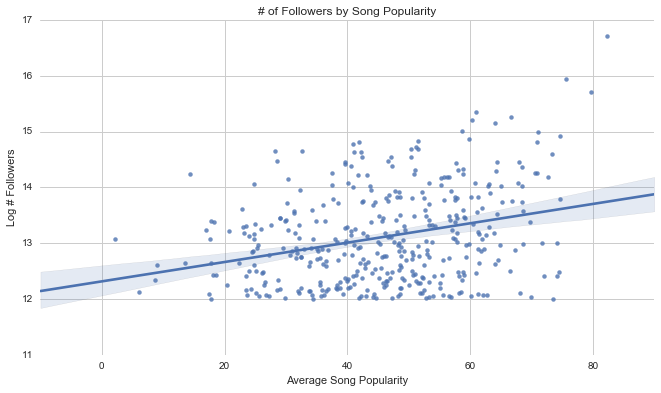

In [83]:
plt.figure(figsize = (11,6))
sns.regplot(np.asarray(pop_top), np.asarray(log_followers_top), marker = 'o', color = 'b')
sns.despine(bottom=True, left=True)
plt.xlabel("Average Song Popularity");
plt.ylabel("Log # Followers")
plt.title("# of Followers by Song Popularity")
plt.show()

### % Popular Artists in a Playlist vs. Log Followers

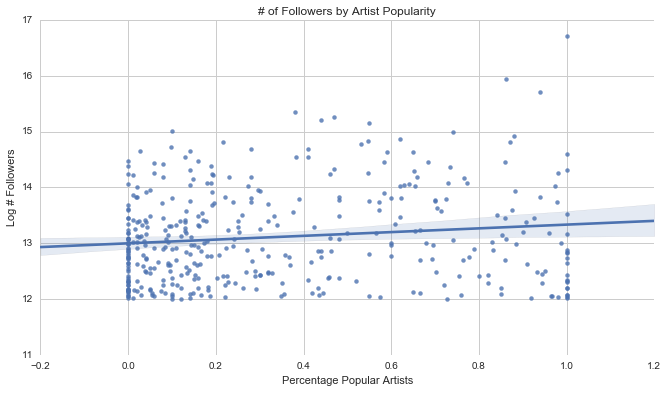

In [77]:
plt.figure(figsize = (11,6))
sns.regplot(top_sorted['popular_artist_pct'], np.asarray(log_followers_top), marker = 'o', color = 'b')
sns.despine(bottom=True, left=True)
plt.xlabel("Percentage Popular Artists");
plt.ylabel("Log # Followers")
plt.title("# of Followers by Artist Popularity")
plt.show()

### Average Artist Popularity vs. Log Followers

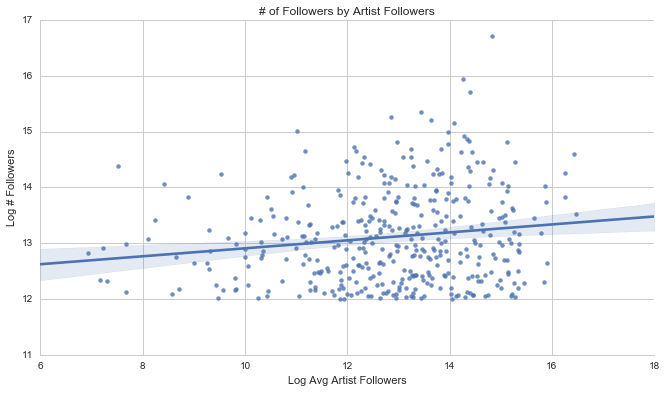

In [80]:
plt.figure(figsize = (11,6))
sns.regplot(top_sorted['log_artist_follow'], np.asarray(log_followers_top), marker = '', color = 'b')
sns.despine(bottom=True, left=True)
plt.xlabel("Log Avg Artist Followers");
plt.ylabel("Log # Followers")
plt.title("# of Followers by Artist Followers")
plt.show()

### Exploring Genre Diversity in Playlists

We thought it would be interesting to see if playlists that are uniform in genre, which we defined as being at least **80% composed of a single genre** of music, were more or less popular than genres which seemingly lacked a theme, and were composed of more of a hodgepodge of songs with varying genres. Above we see that there are a lot more playlists with mixed genre, though the spreads of the two look roughly the same. Thus, on average there seems to be no advantage to either a playlist composed entirely of one genre, or consisting of many genres. 

In [84]:
eda_frame['1genre'] = np.where((eda_frame['pop_pct']>=.8)|(eda_frame['rap_pct']>=.8)|(eda_frame['rock_pct']>=.8), 1, 0)
mixed_genre = eda_frame.loc[eda_frame['1genre'] == 0]
one_genre = eda_frame.loc[eda_frame['1genre'] == 1]

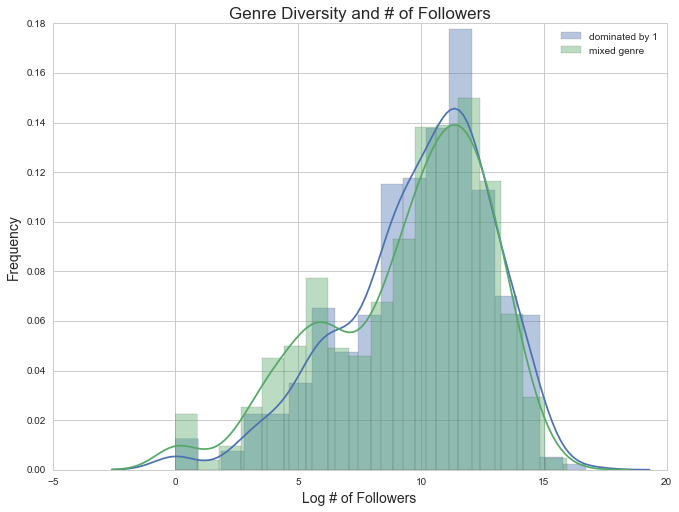

In [89]:
plt.figure(figsize = (11,8))
sns.distplot(one_genre['log_followers'], label='dominated by 1')
sns.distplot(mixed_genre['log_followers'], label='mixed genre')
plt.legend(loc='upper right')
plt.title('Genre Diversity and # of Followers', size = 17)
plt.ylabel('Frequency', size = 14)
plt.xlabel('Log # of Followers', size = 14)
plt.show()

### Heatmap of our Variables

In [95]:
eda_train = eda_frame.drop(['playlist','name','followers'], axis = 1)
train_corr_matrix = pd.DataFrame(np.corrcoef(eda_train.T))
train_corr_matrix.columns = eda_train.columns
train_corr_matrix.index = eda_train.columns

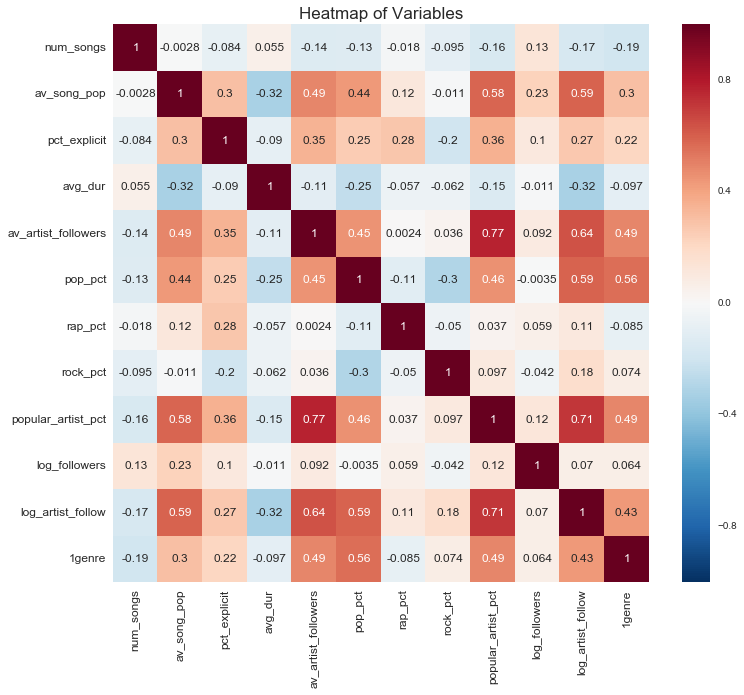

In [96]:
plt.figure(figsize = (12,10))
sns.heatmap(train_corr_matrix,annot=True)
plt.title('Heatmap of Variables', size = 17)
plt.xticks(rotation=90, size = 12) 
plt.yticks(rotation=0, size = 12) 
plt.show()

In [ ]:
artist_counts = df.groupby('artist_name', as_index=False)['count'].count().sort_values('count', ascending=False)
artist_counts = artist_counts.head(30)
artist_counts = artist_counts.sort_values('count')
plt.figure(figsize = (18,10))
sns.barplot(artist_counts['artist_name'], artist_counts['count'], palette="Blues_d")
plt.xticks(rotation=90, size = 17)
plt.title('Top 30 Artists with the Most Appearances in Playlists', size = 20)
plt.xlabel('Artist Name', size = 15)
plt.ylabel('Counts', size = 15)
plt.show()